In [12]:
import numpy as np
import matplotlib.pyplot as plt
from Router import *
from Packet import *

In [ ]:
# The network is defined by a sequence of connections: (node1, node2, etx, ticks)
# where ticks are the number of timesteps needed to send a packet between the nodes
network = [("A","B", 1, 1), ("B", "C", 1, 1), ("C", "D", 1, 1)]

# Initial state is a dict per router with value (dummy packets, data packets), 
# where dummy packets are used to build the queue gradient

# Will hardcode this for now. Don't think I need to waste time with autogenerating this
init_states = {"A": (3,0), "B": (2, 3), "C": (1, 3), "D": (0,0)}

# Sink is node with 0 dummy packets
sink = [router for router, state in init_states.items() if state[0] == 0][0]

router_graph = build_network(network, sink)




In [3]:
# Set up router graph
router_graph = []
num_routers = 4

router_graph = [Router(chr(65 + i)) for i in range(num_routers)]

router_graph[0].createPath(router_graph[1], 1, 1)
router_graph[1].createPath(router_graph[2], 1, 1)
router_graph[2].createPath(router_graph[3], 1, 1)
router_graph[3].sink = True

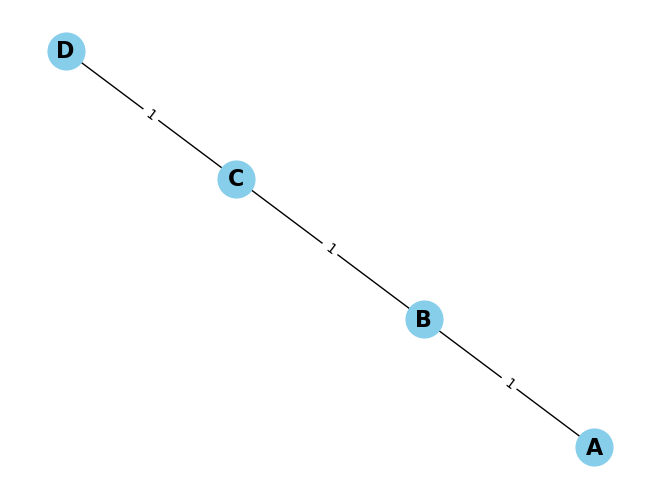

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

# print router graph
G = nx.Graph()
for router in router_graph:
    G.add_node(router.name)

for router in router_graph:
    for dest in router.dests:
        G.add_edge(router.name, dest[0].name, weight=dest[1])

# Position nodes using a layout
pos = nx.spring_layout(G)

# Draw the nodes and edges
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=700, edge_color='k', font_size=16, font_weight='bold')

# Draw edge labels using the weights
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.show()

In [5]:
print(router_graph[3].queue)

[]


In [6]:

# def plot_queues(all_snapshots, router_labels, max_bar=5):
#     """Plot the queues of all routers from collected snapshots with color-coded packet types."""
#     num_timesteps = len(all_snapshots)
#     num_routers = len(router_labels)
    
#     # Set up the figure and axes
#     fig, axs = plt.subplots(num_timesteps, num_routers, figsize=(num_routers * 3, num_timesteps * 3))
#     if num_timesteps == 1:  # Make sure axs is always a 2D array
#         axs = [axs]

#     # Plotting each timestep's data
#     for timestep in range(num_timesteps):
#         for router_idx in range(num_routers):
#             current_ax = axs[timestep][router_idx] if num_timesteps > 1 else axs[router_idx]
#             queue = all_snapshots[timestep][router_idx]
#             bottom_position = 0
#             for packet in queue:
#                 color = 'black' if packet == 1 else 'white'
#                 current_ax.bar(router_idx, 1, bottom=bottom_position, color=color)
#                 bottom_position += 1

#             current_ax.set_title(f'Timestep {timestep + 1}')
#             current_ax.set_ylim(0, max_bar)  # Adjust y-axis limit to show at least 5 or the max queue length

#     # Setting global x-ticks and labels after all subplots
#     for ax in axs.flat:
#         ax.set_xticks(range(num_routers))
#         ax.set_xticklabels(router_labels)

#     plt.tight_layout()
#     plt.show()





Iteration: 0
[[[0, 0, 0], [0, 0, 1, 1, 1], [0, 1, 1, 1], []]]
Decision Phase Router: A
Next packet for router to send: Packet(ID: 13, Type: dummy, Progress: 0)
Decision Phase Router: B
Next packet for router to send: Packet(ID: 16, Type: dummy, Progress: 0)
Packet route: Router A, ETX: 1, Ticks: 1, type: dummy
Decision Phase Router: C
Next packet for router to send: Packet(ID: 18, Type: dummy, Progress: 0)
Packet route: Router D, ETX: 1, Ticks: 1, type: dummy
Decision Phase Router: D
Next packet for router to send: None
====
Send Phase Router: B
Moving Packet(ID: 16, Type: dummy, Progress: 1) to A
Send Phase Router: C
Moving Packet(ID: 18, Type: dummy, Progress: 1) to D
Iteration: 1
[[[0, 0, 0], [0, 0, 1, 1, 1], [0, 1, 1, 1], []], [[0, 0, 0, 0], [0, 1, 1, 1], [1, 1, 1], []]]
Decision Phase Router: A
Next packet for router to send: Packet(ID: 13, Type: dummy, Progress: 0)
Decision Phase Router: B
Next packet for router to send: Packet(ID: 17, Type: dummy, Progress: 0)
Decision Phase Rou

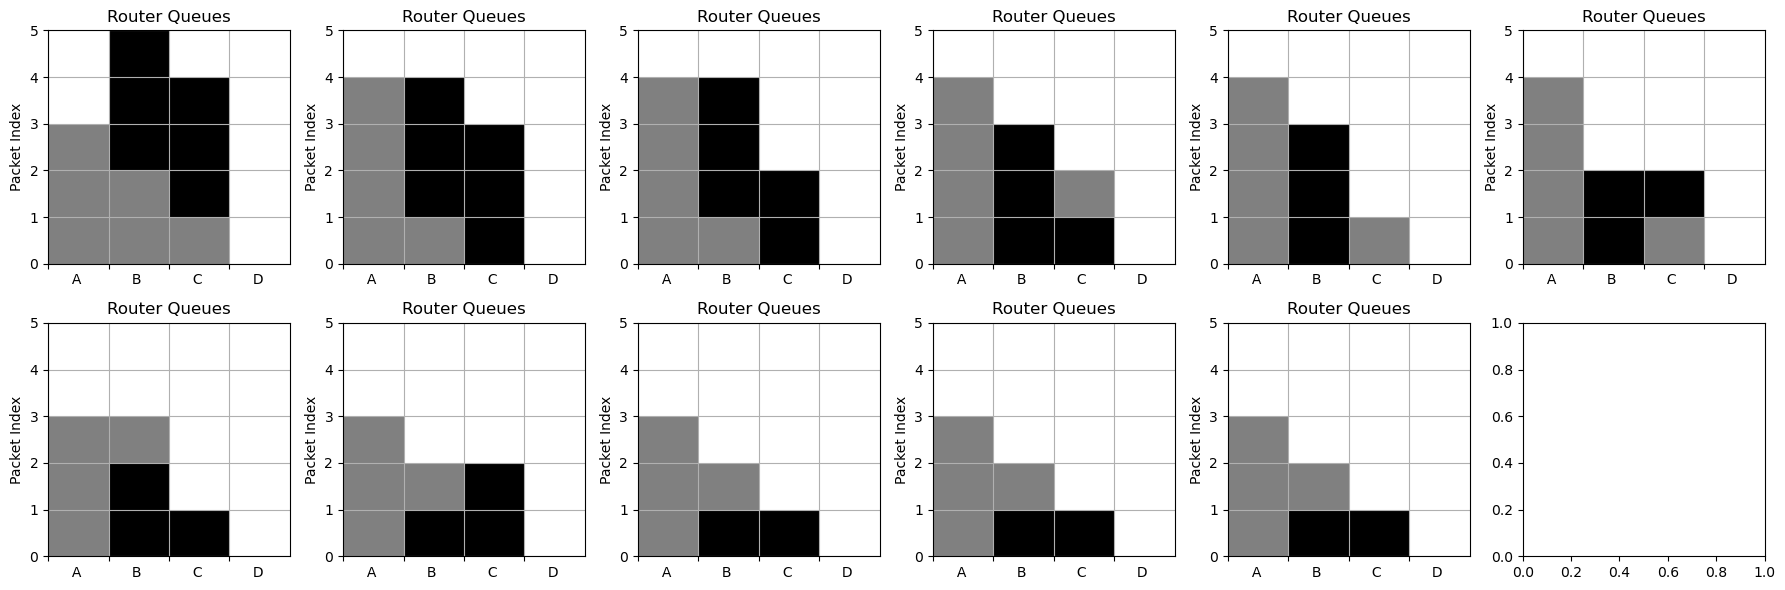

In [11]:
# # Run simulation
# router_queues = []
# # Need to add a tick rate?

init_packets(router_graph)

all_snapshots = []

num_timesteps = 11  # Define the number of timesteps

for iter in range(num_timesteps):
    
    print(f"============\nIteration: {iter}\n============")
    
    eval_bcp(router_graph, all_snapshots, queue_type="FIFO")
    
        
# Determine the number of rows needed
num_snapshots = len(all_snapshots)
num_cols = 6
num_rows = (num_snapshots + num_cols - 1) // num_cols  # Ceiling division
router_labels = ['A', 'B', 'C', 'D']


# Create a figure with appropriate size
fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 3, num_rows * 3), squeeze=False)

for idx, snapshot in enumerate(all_snapshots):
    plot_snapshot(snapshot, idx, router_labels, fig, axes)

plt.tight_layout()
plt.show()
    
    # snapshot.append([(1 if pkt.type == 'data' else 0) for pkt in router.queue])
    
# # Simulation loop
# num_timesteps = 1  # Define the number of timesteps
# all_snapshots = []
# for timestep in range(num_timesteps):
#     snapshot = update_routers(router_graph)
#     all_snapshots.append(snapshot)
    
    
# print(all_snapshots)

# Plot all collected queue data after the simulation
# plot_queues(all_snapshots, ['A', 'B', 'C', 'D'])


Ok now for other networks, different ETXs? Different penalties?
Actually lets refactor for a bit so the final code's a bit cleaner

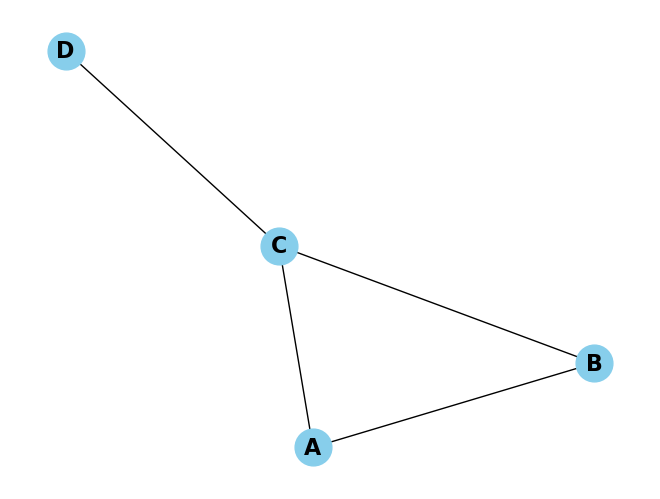

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph object
G = nx.Graph()

# Add nodes
G.add_node("A")
G.add_node("B")
G.add_node("C")
G.add_node("D")

# Add edges
G.add_edge("A", "B")
G.add_edge("B", "C")
G.add_edge("C", "A")
G.add_edge("C", "D")

# Draw the graph
nx.draw(G, with_labels=True, node_color='skyblue', node_size=700, edge_color='k', font_size=16, font_weight='bold')
plt.show()